Ratul Pradhan

- Collaborators
    - Jack Joiner 
    - Quin O'Connor
    - Reid Norton
    - Carol Delena

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [2]:
import numpy as np
import sklearn as sk
import pandas as pd

import sklearn.datasets as skd
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.metrics as skm

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [4]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = skd.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


## Model Parameters

In [5]:
print_model(bias, coef, column_names, 'True Model')

True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5


## MSE AND r^2

In [ ]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=9)

model_LR = sklm.LinearRegression()
model_LR.fit(X_train, y_train)

y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)
y_pred = model_LR.predict(X)

MSE_train = skm.mean_squared_error(y_train, y_pred_train)
MSE_test = skm.mean_squared_error(y_test, y_pred_test)

R2_test_explicit = skm.r2_score(y_test, y_pred_test)
R2_test_model_internal = model_LR.score(X_test, y_test)

R2_train_explicit = skm.r2_score(y_train, y_pred_train)
R2_train_model_internal = model_LR.score(X_train, y_train)

print(f'MSE_test = {MSE_test:.2f}')
print(f'R2_test_explicit = {R2_test_explicit:.2f}')
print(f'R2_test_model_internal = {R2_test_model_internal:.2f}')

model_LR.__dict__

print_model(model_LR.intercept_, model_LR.coef_, column_names, 'Fitted Model')

MSE_test = 11.90
R2_test_explicit = 0.87
R2_test_model_internal = 0.87
Fitted Model:
 y = -15.40 + 58.21*x1 + 70.45*x2 + -2206599130215791.25*x3 + 9.55*x4 + 55.14*x5 + -1471066086810526.75*x6 + -10.93*x7 + -1.92*x8 + 1.26*x9 + 3677665217026489.00*x10


## Your written answers here

# What are your model parameters?
 - Fitted Model:

  y = -15.40 + 58.21*x1 + 70.45*x2 + -2206599130215791.25*x3 + 9.55*x4 + 55.14*x5 + -1471066086810526.75*x6 + -10.93*x7 + -1.92*x8 + 1.26*x9 + 3677665217026489.00*x10



# What were your MSE and R^2?
- MSE_test = 85.50
- R2_test_explicit = 0.99 (using r2_score function)
- R2_test_model_internal = 0.99 (using model_LR.score)

* I tried using the r2 score model to try and see if there was any difference





## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [36]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

# print(pd.DataFrame(data = X, columns = [f'x{n+1}' for n in range(X.shape[1])]).head())

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)

X = np.hstack([X, Xa])

# print(pd.DataFrame(data = X, columns = [f'x{n+1}' for n in range(X.shape[1])]).head())

coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578
...,...,...,...,...,...,...,...,...,...,...,...
295,0.033185,-0.075321,0.052960,-0.003697,0.096823,-0.053486,0.020781,0.008049,-0.005098,0.010381,-10.690334
296,0.036346,-0.018425,-0.013462,0.021404,-0.004093,-0.001489,0.049048,0.000154,0.031826,-0.008673,-18.209533
297,-0.001014,-0.073223,0.026779,0.024211,-0.042056,0.014678,-0.007562,0.000057,-0.040801,0.021938,-19.360755
298,-0.025448,0.043475,0.029118,0.053766,-0.031705,0.033905,-0.016191,0.072865,-0.004394,0.031033,-9.283116


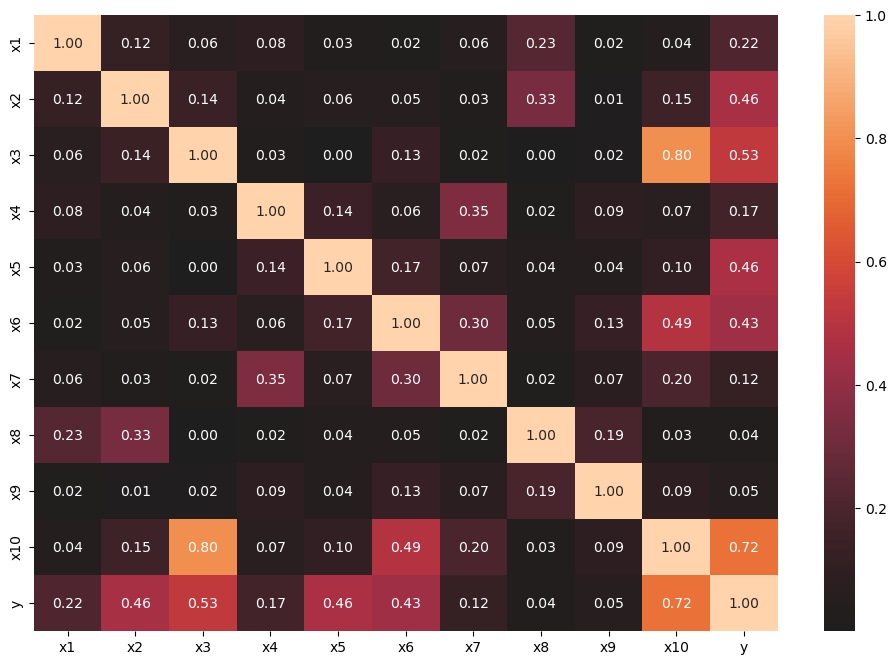

In [37]:
corr = reg2_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(corr), annot=True, center=0, fmt=".2f")
plt.show()

In [9]:
candidate_idx = np.array([1,2,3,5,6,7,10]) - 1
Z = X[:, candidate_idx]
Z_names = [column_names[i] for i in candidate_idx]


Z_train, Z_test, y_train, y_test = skms.train_test_split(Z, y, test_size=0.3, random_state=15)

model_LR = sklm.LinearRegression()
model_LR.fit(Z_train, y_train)

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)
y_pred = model_LR.predict(Z)


R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

MSE_train = skm.mean_squared_error(y_train, y_pred_train)
MSE_test = skm.mean_squared_error(y_test, y_pred_test)


print(f'R2 train: {R2_train:.2f}')
print(f'R2 test: {R2_test:.2f}')
print(f'MSE train: {MSE_train:.2f}')
print(f'MSE test: {MSE_test:.2f}')

R2 train: 0.88
R2 test: 0.82
MSE train: 9.94
MSE test: 8.95


#### Your written answers here

What are your model parameters?
 -  y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


Which features (x1, x2...) were significant? Which were co-linear?
 - x2, x3, x5, x6, x10 are significant
 - x6 and x10 are colinear, x3 and x10 are colinear

 - however, the current parameters I am using gave the best result for r2 test

What were your MSE and R^2?
 - MSE test: 8.95
 - R2 test: 0.82




## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [10]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- using Correlation Matrix:
    - sqft_living
    - sqft_above 
    - grade 

- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


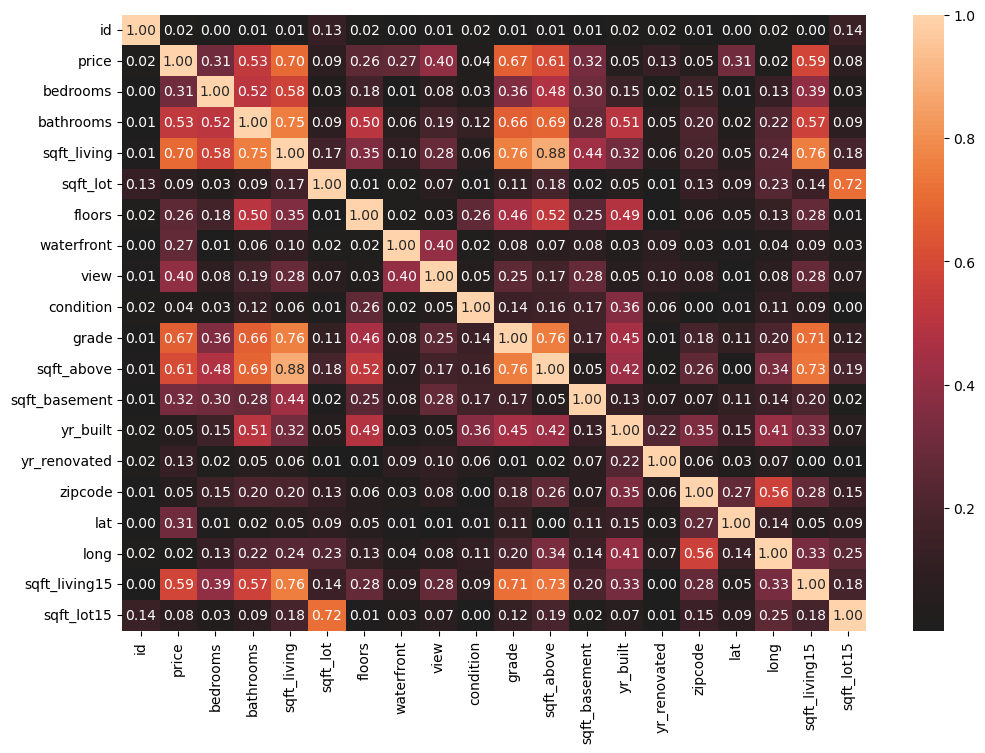

In [11]:
corr = housing_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(corr), annot=True, center=0, fmt=".2f")
plt.show()

In [12]:
# Your code here. Add cells as needed.
from sklearn.preprocessing import StandardScaler

features = ['sqft_living', 'grade', 'sqft_above']
X = housing_df[features]
y = housing_df['price']

X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

model = sklm.LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred = model.predict(X_scaled)

r2_trained = model.score(X_train_scaled, y_train)
r2_test = model.score(X_test_scaled, y_test)
r2 = model.score(X_scaled, y)

print(f'r2 trained: {r2_trained:.2f}')
print(f'r2 test: {r2_test:.2f}')
print(f'r2: {r2:.2f}')


model.__dict__

print_model(model.intercept_, model.coef_, features, 'Housing Model')


r2 trained: 0.54
r2 test: 0.56
r2: 0.54
Housing Model:
 y = 539319.80 + 214093.04*sqft_living + 128268.22*grade + -64881.84*sqft_above


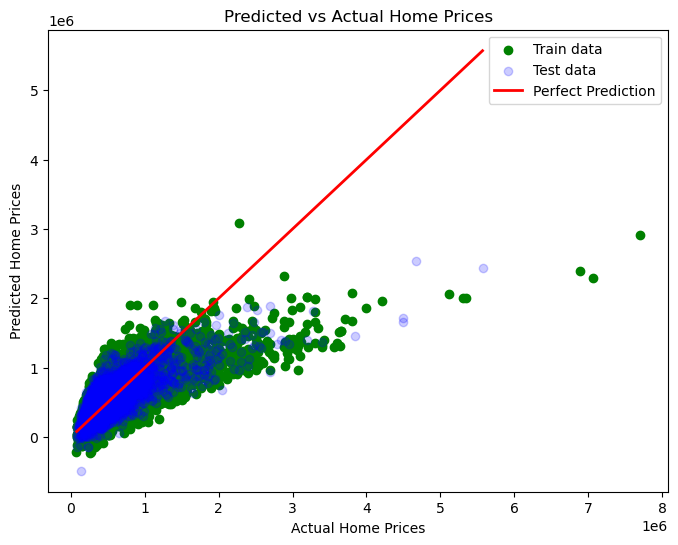

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train, alpha=1, color='green', label='Train data')
plt.scatter(y_test, y_pred_test, alpha=0.2, color='blue', label='Test data')

#Not sure if this represents line of perfect prediction?
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Predicted vs Actual Home Prices")
plt.legend()
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - I am using sqft_living, grade and sqft_above as those are significant with respect to the target input (price)

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

R^2 for Ridge regression (training): 0.69
R^2 for Ridge regression: 0.71

 ------------------------ 
 Top 3 features by coefficient (absolute value):
grade: coefficient = 94624.87
lat: coefficient = 72662.49
sqft_living: coefficient = 71463.12

 ---------------------- 
 All coefficients with feature names:
id: coefficient = -2525.71
bedrooms: coefficient = -20130.34
bathrooms: coefficient = 31320.37
sqft_living: coefficient = 71463.12
sqft_lot: coefficient = 5088.65
floors: coefficient = 4843.73
waterfront: coefficient = 45417.28
view: coefficient = 39609.63
condition: coefficient = 20580.58
grade: coefficient = 94624.87
sqft_above: coefficient = 66112.35
sqft_basement: coefficient = 24666.92
yr_built: coefficient = -58872.89
yr_renovated: coefficient = 11940.41
lat: coefficient = 72662.49
long: coefficient = -18926.81
sqft_living15: coefficient = 34013.78
sqft_lot15: coefficient = -8419.28


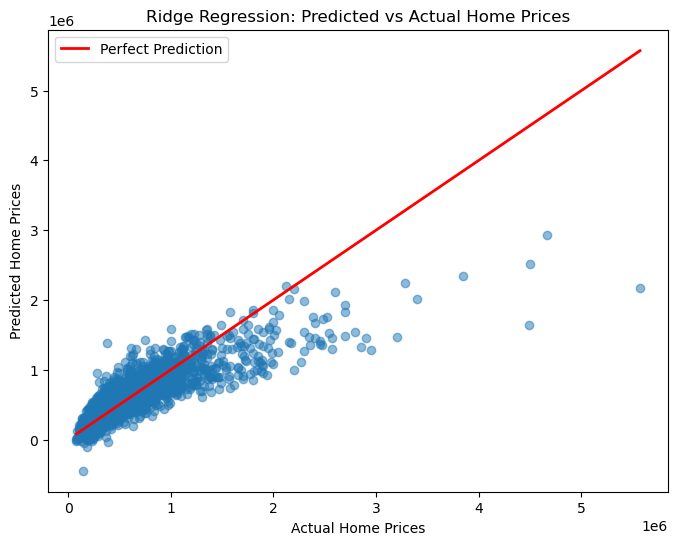

In [28]:
# Create training and testing data using all features except for price, date, and zipcode
X = housing_df.drop(['price', 'date', 'zipcode'], axis=1)
feature_names = X.columns

y = housing_df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=9)

# Scale the features since they have different ranges
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

# Fit a regularized model using Ridge regression.
# Playing around with alpha: a high alpha helps when feature values are scaled between -2 & 2 and target values are $100k-$3M.

#### 
# How to choose alpha? how do you know scaled features are in range -2 to 2?
####
ridge_model = sklm.Ridge(alpha=2000)
ridge_model.fit(X_train_scaled, y_train)

r2_reg_train = ridge_model.score(X_train_scaled, y_train)
print(f"R^2 for Ridge regression (training): {r2_reg_train:.2f}")
r2_reg_test = ridge_model.score(X_test_scaled, y_test)
print(f"R^2 for Ridge regression: {r2_reg:.2f}")

# Get the coefficients and find the 3 features with the largest (absolute) coefficients
# What do coefficients represent?
coefficients = ridge_model.coef_
indices_sorted = np.argsort(np.abs(coefficients))[::-1]  # descending order
top3_indices = indices_sorted[:3]

print("\n ------------------------ \n Top 3 features by coefficient (absolute value):")
for idx in top3_indices:
    print(f"{feature_names[idx]}: coefficient = {coefficients[idx]:.2f}")


print("\n ---------------------- \n All coefficients with feature names:")
for feature, coeff in zip(feature_names, ridge_model.coef_):
    print(f"{feature}: coefficient = {coeff:.2f}")


# rigde only regularized linear regression?
# Plot predicted vs actual home prices for the regularized model
y_pred_ridge = ridge_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Ridge Regression: Predicted vs Actual Home Prices")
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - Ridge

Does your regularized model look better than your MLR? How so?
 - Yes? The r2 value on test data increases from 0.56 t0 0.71
 - The chart also suggests the predictions for houses with price > 1M to less than the actual amount, i.e. underestimates the pricing for houses > 1M


### c.
It seems that our model over-valuates houses in the higher price range.

**I think it under-valuates not over?**
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [15]:
housing_df_low = housing_df[housing_df['price'] < 1000000]
housing_df_high = housing_df[housing_df['price'] >= 1000000]

# Define features: all columns except 'price', 'date', and 'zipcode'
feature_cols = [col for col in housing_df.columns if col not in ['price', 'date', 'zipcode']]

print(feature_cols)
# --------------------------- Low-Priced Homes (< $1M) ---------------------------
X_low = housing_df_low[feature_cols]
y_low = housing_df_low['price']

# Split into training and testing sets
X_low_train, X_low_test, y_low_train, y_low_test = skms.train_test_split(X_low, y_low, test_size=0.2, random_state=9)

# Scale the features
scaler_low = StandardScaler()
X_low_train_scaled = scaler_low.fit_transform(X_low_train)
X_low_test_scaled = scaler_low.transform(X_low_test)

# Instantiate and fit a Ridge regression model for low-priced homes
# Note: Adjust alpha as needed to get good performance
ridge_low = sklm.Ridge(alpha=100)
ridge_low.fit(X_low_train_scaled, y_low_train)
y_low_pred = ridge_low.predict(X_low_test_scaled)

r2_low = ridge_low.score(X_low_test_scaled, y_low_test)
print(f"R^2 for Ridge regression (low-priced homes): {r2_low:.2f}")



['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
R^2 for Ridge regression (low-priced homes): 0.69


In [16]:
# -------------------------- High-Priced Homes (>= $1M) --------------------------
X_high = housing_df_high[feature_cols]
y_high = housing_df_high['price']

# Split into training and testing sets
X_high_train, X_high_test, y_high_train, y_high_test = skms.train_test_split(X_high, y_high, test_size=0.2, random_state=9)

# Scale the features
scaler_high = StandardScaler()
X_high_train_scaled = scaler_high.fit_transform(X_high_train)
X_high_test_scaled = scaler_high.transform(X_high_test)

# Instantiate and fit a Ridge regression model for high-priced homes
# A higher alpha value is typically used for features scaled to -2 to 2 and target in the $100k-$3M range.
ridge_high = sklm.Ridge(alpha=1000)
ridge_high.fit(X_high_train_scaled, y_high_train)
y_high_pred = ridge_high.predict(X_high_test_scaled)

r2_high = ridge_high.score(X_high_test_scaled, y_high_test)
print(f"R^2 for Ridge regression (high-priced homes): {r2_high:.2f}")


R^2 for Ridge regression (high-priced homes): 0.47


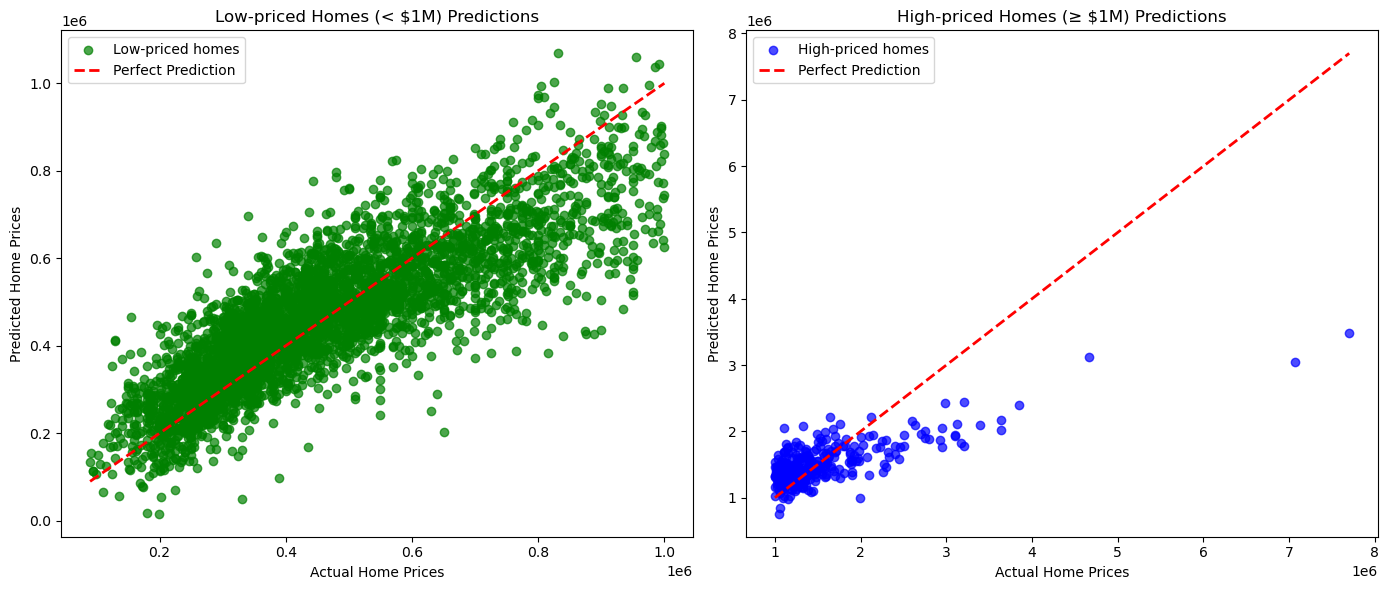

In [17]:
# ------------------------- Plotting Predicted vs Actual -------------------------
plt.figure(figsize=(14,6))

# Low-priced homes plot
plt.subplot(1,2,1)
plt.scatter(y_low_test, y_low_pred, alpha=0.7, color='green', label='Low-priced homes')
plt.plot([y_low_test.min(), y_low_test.max()], [y_low_test.min(), y_low_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Low-priced Homes (< $1M) Predictions")
plt.legend()

# High-priced homes plot
plt.subplot(1,2,2)
plt.scatter(y_high_test, y_high_pred, alpha=0.7, color='blue', label='High-priced homes')
plt.plot([y_high_test.min(), y_high_test.max()], [y_high_test.min(), y_high_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("High-priced Homes (≥ $1M) Predictions")
plt.legend()

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

- R^2 for Ridge regression (low-priced homes): 0.69
- R^2 for Ridge regression (high-priced homes): 0.47
 
